<a href="https://colab.research.google.com/github/jaimin159/SHALA2020/blob/master/DS_L2_17_Apr_Assignment_2_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [0]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
# Load the file as a dataframe 
df = pd.read_csv("train.csv");

In [0]:
movies = pd.read_csv("moviesData.csv");

In [0]:
# Print the first ten rows of df
df.head(10)

### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [23]:
# Print the first five rows of MonthlyRate
print (df['MonthlyRate'].head())

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64


In [0]:
# Find the details of MonthlyRate 
print ("Mean:", df['MonthlyRate'].mean())
print ("Maximum:", df['MonthlyRate'].max())
print ("Minimum:", df['MonthlyRate'].min())

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [0]:
df = df.dropna();
print ("Size After Dropping Missing Values:",df.size);

### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [0]:
# Add a column named MonthRateNew 
df['MonthRateNew'] = (df['MonthlyRate']-df['MonthlyRate'].mean())/df['MonthlyRate'].std();

### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [0]:
df2 = movies.dropna(axis=0);
rowMissingValueCount = movies.shape[0] - df2.shape[0];
print ("Size of movies after dropping row: ",df2.size)
for column in movies:
    if (np.issubdtype(movies[column].dtype, np.number)):
      movies[column] = movies[column].fillna(movies[column].mean())
    else:
      movies[column] = movies[column].fillna(movies[column].mode())

---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

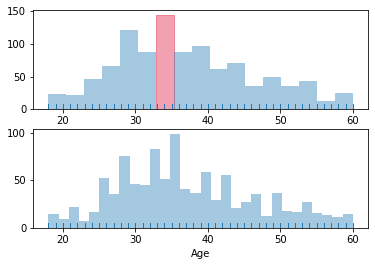

In [124]:
f, axes = plt.subplots(2, 1)
ax = sns.distplot(df['Age'],kde=False, rug=True,ax=axes[0]);
heights = [p.get_height() for p in ax.patches]
highest = sorted(heights)[-1]
for p in ax.patches:
    if  p.get_height() == highest:
        p.set_color('crimson')
ax = sns.distplot(df['Age'],kde=False, rug=True,bins=30,ax=axes[1]);


In [0]:
sns.scatterplot(df['Age'],df['Attrition'])

### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

In [0]:
sns.countplot(df['Attrition'].value_counts(normalize=True))

### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

Text(0, 0.5, 'Attrition')

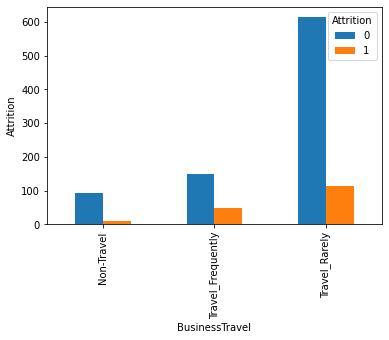

In [120]:
# Draw a cross tab of Attritiona and BusinessTravel 
# You may use crosstab of pandas for this 

pd.crosstab(df.BusinessTravel, df.Attrition).plot(kind="bar")
plt.ylabel("Attrition")

### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

Text(0, 0.5, 'Attrition')

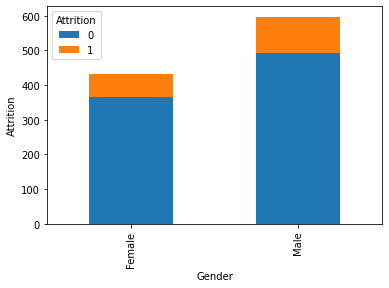

In [121]:
pd.crosstab(df.Gender, df.Attrition).plot(kind="bar", stacked=True)
plt.ylabel("Attrition")


### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

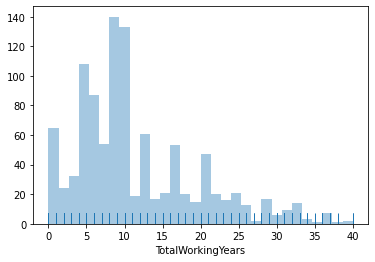

In [126]:
sns.distplot(df['TotalWorkingYears'],kde=False, rug=True,bins=30);


### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


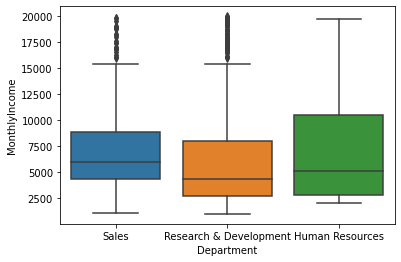

In [122]:
sns.boxplot('Department', 'MonthlyIncome', data=df)


### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

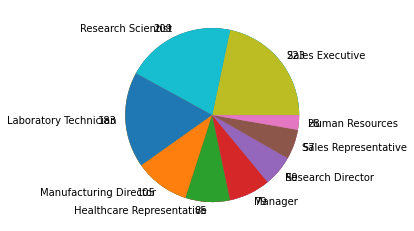

In [123]:
number_of_roles = df.JobRole.value_counts()
plt.pie(number_of_roles)
plt.pie(number_of_roles, labels=number_of_roles)
plt.pie(number_of_roles, labels=number_of_roles.index.tolist())
plt.show()

